In [ ]:
%matplotlib inline

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
scatter_export = os.path.join("figures", "2018_by_city.png")
city_csv = os.path.join("data", "city_data.csv")
ride_csv = os.path.join("data", "ride_data.csv")
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [2]:
# Read the City Data
#city_df.dtypes
#city_df.nunique()
#city_df.describe()
#city_df.driver_count.count()
#city_df.city.count()
#city_df.type.count()
#city_df.count()
city_df = city_df.drop_duplicates("city", keep="first")
#city_df.head()

In [3]:
# Read the City Data
#ride_df.head()
#ride_df.dtypes
#ride_df.nunique()
#ride_df.describe()
#ride_df.count()

In [4]:
# Combine the data into a single dataset
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
#df = pd.merge(ride_df, city_df, left_index=True, right_index=True, on='city') #nope
#df = pd.merge(ride_df, city_df, how='outer', on='city') #nope
#df = pd.merge(ride_df, city_df, how='inner', on='city') #nope
df = pd.merge(ride_df, city_df, how='left', on='city') #yep
# Display the data table for preview
df.head()
#df.nunique()
#df.describe()
#df.dtypes
#df.count()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
#Graph data 
#X = total number of rides(per city)
#Y = mean fare price
#Bubble = driver count per city
#need to figure out count of rides per city per city type
#make 3 different plots  for each city type Urban, Suburban, and Rural

#Obtain the x and y coordinates for each of the three city types

#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
city_group = df.groupby('city')
fare_mean = city_group.mean()['fare']
#print(fare_mean)
ride_count = city_group["ride_id"].count()
#print(ride_count)
driver_count = city_group.mean()["driver_count"]
#print(driver_count)
rides = city_group['ride_id'].count()
#print(rides)
city_type = city_df.set_index('city')['type']
#plt.scatter(ride_count, fare_sum, s=driver_count)

#Make a new DF with all the new information instead of 4 series
new_df = pd.DataFrame({"Driver Count":driver_count, "Mean Fare":fare_mean, "Ride Count":ride_count,"City Type": city_type})

new_df.head()

,Driver Count,Mean Fare,Ride Count,City Type
Amandaburgh,12.0,24.641667,18,Urban
Barajasview,26.0,25.332273,22,Urban
Barronchester,11.0,36.422500,16,Suburban
Bethanyland,22.0,32.956111,18,Suburban
Bradshawfurt,7.0,40.064000,10,Rural


In [6]:
# Build the scatter plots for each city types
# Urban
# How do i make the bubbles bigger..
# https://plot.ly/matplotlib/line-and-scatter/
#x_axis = total number of rides per city
#y_axis = average fare
#grouped by city
#circle size correlates with driver count per city
#plt.scatter(x='driver_count', y='fare', s=rural['type'].count(), color='red')
urban_df = new_df[new_df['City Type'] == 'Urban']
#plt.scatter(urban_df['Ride Count'], urban_df['Mean Fare'], s=urban_df['Driver Count'], color='blue', label='Urban')
# Build the scatter plots for each city types
# Suburban
suburban_df = new_df[new_df["City Type"] == "Suburban"]
#plt.scatter(suburban_df["Ride Count"], suburban_df["Mean Fare"], s=suburban_df["Driver Count"], color="red", label="Suburban")
# Build the scatter plots for each city types
# Rural
rural_df = new_df[new_df["City Type"] == "Rural"]
#plt.scatter(rural_df["Ride Count"], rural_df["Mean Fare"], s=rural_df["Driver Count"], color="green", label="Rural")

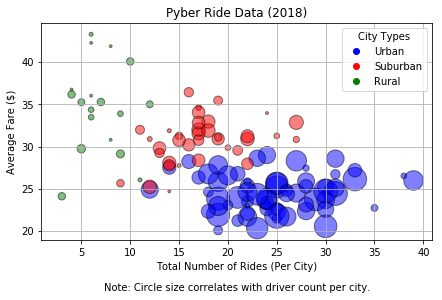

In [17]:
#Paste the data to plot all together because it wouldn't aggregrate it by itself
plt.scatter(urban_df['Ride Count'], urban_df['Mean Fare'], s=urban_df['Driver Count']*8,
            edgecolor='black', alpha=0.5, color='blue', label='Urban')
plt.scatter(suburban_df["Ride Count"], suburban_df["Mean Fare"], s=suburban_df["Driver Count"]*8, 
            edgecolor='black', alpha=0.5, color="red", label="Suburban")
plt.scatter(rural_df["Ride Count"], rural_df["Mean Fare"], s=rural_df["Driver Count"]*8, 
            edgecolor='black', alpha=0.5, color="green", label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Data (2018)")
plt.figtext(0.25, -0.05, 'Note: Circle size correlates with driver count per city.')
plt.grid(True)

# Create a legend
plt.legend(title="City Types")
leg_colors = {'Urban':'blue', 'Suburban':'red', 'Rural':'green'}
#now they're all weird sizes..
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in leg_colors.values()]
#now they're not!
plt.legend(markers, leg_colors.keys(), numpoints=1, title='City Types', loc='best')
#width,height because the default box looked bad
plt.rcParams['figure.figsize'] = [7,4]
plt.savefig(scatter_export)
plt.show()
# Incorporate a text label regarding circle size
#ttps://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
#the dots are kind of small, fixed by multiplying s values *10
#outline circles in black by adding edge color to plt.scatters
#make it easier to read by adding alpha -see throughness- alpha=0.5
#add the figure text, can't figure out how to make it 2 lines
# Save Figure to the Figures Folder
